### Text Mining on Elon-Musk-tweets

ONE:
* Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)

 TWO:
* Extract reviews of any product from ecommerce website like amazon
* Perform emotion mining

# Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)

## Sentiment Analysis:
The main purpose of sentiment analysis is to comprehend the **attitude of people towards a particular product**, service, company, campaigns, and activities. **Whether positive or negative**, with the help of sentiment analysis

## 1.Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import spacy
import string
from wordcloud import WordCloud,STOPWORDS

## 2. Import Data

In [2]:
tweets=pd.read_csv('Elon_musk.csv',encoding='Latin')
tweets

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [3]:
#Dropping the unnamed column
tweets.drop('Unnamed: 0',axis=1)

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


## 3.Text Cleaning

In [4]:
tweets= [Text.strip() for Text in tweets.Text] #REMOVES BOTH LEADING AND THE TRAILING CHARACTERS
tweets= [Text for Text in tweets if Text] #Removes empty strings,Bcoz the are considered in python as False
tweets[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [5]:
#Joining the List into One single String/Text
sentence=''.join(tweets)
sentence

'@kunalb11 I\x92m an alien@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?@joerogan @Spotify Great interview!@gtera27 Doge is underestimated@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!Happy New Year of the Ox! https://t.co/9WFKMYu2ojFrodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.The most entertaining outcome is the most likely@GiveDirectly Just sent someJust agree to do Clubhouse with @kanyewesthttps://t.co/3rWE9uHSTS@geoffkeighley @UnrealEngine It\x92s getting realBought some Dogecoin for lil X, so he can be a toddler hodler@JoshManMode He definitely has issues, but the sentencing seems a bit high@freewalletorg Thanks for fixing@freewalletorg Please unlock my account@AstroJordy <U+0001F923><U+0001F923>This is 

In [6]:
#Removing Punctuations
no_punc_text=sentence.translate(str.maketrans('','',string.punctuation))
no_punc_text

'kunalb11 I\x92m an alienIDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried itjoerogan Spotify Great interviewgtera27 Doge is underestimatedteslacn Congratulations Tesla China for amazing execution last year Now on to the next for even moreHappy New Year of the Ox httpstco9WFKMYu2ojFrodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrMOwenSparks flcnhvy anonyx10 Haha thanks flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocationThe most entertaining outcome is the most likelyGiveDirectly Just sent someJust agree to do Clubhouse with kanyewesthttpstco3rWE9uHSTSgeoffkeighley UnrealEngine It\x92s getting realBought some Dogecoin for lil X so he can be a toddler hodlerJoshManMode He definitely has issues but the sentencing seems a bit highfreewalletorg Thanks for fixingfreewalletorg Please unlock my accountAstroJordy U0001F923U0001F923This is true power haha httpstcoFc9uhQSd7Ofreewalletorg Any crypto wa

### Regular Expression(re):
  >* It is extremely useful for extracting information from text such as code, files, log, spreadsheets or even documents.
  >* Regular Expressions are a powerful and flexible method of specifying the patterns

In [7]:
#Removes https or Url within text
import re
no_url_text= re.sub(r'http\S+','',no_punc_text)
no_url_text

'kunalb11 I\x92m an alienIDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried itjoerogan Spotify Great interviewgtera27 Doge is underestimatedteslacn Congratulations Tesla China for amazing execution last year Now on to the next for even moreHappy New Year of the Ox  was the underdoge\nAll thought he would fail\nHimself most of all  flcnhvy anonyx10 Haha thanks flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocationThe most entertaining outcome is the most likelyGiveDirectly Just sent someJust agree to do Clubhouse with kanyewest UnrealEngine It\x92s getting realBought some Dogecoin for lil X so he can be a toddler hodlerJoshManMode He definitely has issues but the sentencing seems a bit highfreewalletorg Thanks for fixingfreewalletorg Please unlock my accountAstroJordy U0001F923U0001F923This is true power haha  Any crypto wallet that won\x92t give you your private keys should be avoided at all costsfreewalletorg Your app sucksRT SpaceX

## 4. Text Preprocessing

### 4.1 Tokenization
 * Splitting/Breaking the text into words

In [8]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
text_tokens =word_tokenize(no_url_text)
print(text_tokens)

['kunalb11', 'I\x92m', 'an', 'alienIDAACarmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'itjoerogan', 'Spotify', 'Great', 'interviewgtera27', 'Doge', 'is', 'underestimatedteslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'moreHappy', 'New', 'Year', 'of', 'the', 'Ox', 'was', 'the', 'underdoge', 'All', 'thought', 'he', 'would', 'fail', 'Himself', 'most', 'of', 'all', 'flcnhvy', 'anonyx10', 'Haha', 'thanks', 'flcnhvy', 'anonyx10', 'Indeed', 'Tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocationThe', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likelyGiveDirectly', 'Just', 'sent', 'someJust', 'agree', 'to', 'do', 'Clubhouse', 'with', 'kanyewest', 'UnrealEngine', 'It\x92s', 'getting', 'realBought', 'some', 'Dogecoin', 'for', 'lil', 'X', 'so', 'he', 'can', 'be', 'a', 'toddler', 'hodlerJoshManMode', 'He', '

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shaik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


####   NLTK
* NLTK (Natural Language Toolkit) Library is a suite that contains libraries and programs for statistical language processing. It is one of the most powerful NLP libraries, which contains packages to make machines understand human language and reply to it with an appropriate response
####  punkt
* This tokenizer divides a text into a list of sentences, by using an unsupervised algorithm to build a model for abbreviation words, collocations, and words that start sentences.

In [9]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shaik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shaik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
len(text_tokens)

18463

### 4.2 Remove Stop Words
 * The words that doesn't bare any information/Meaning on its own.And depends on prior and superior Words

In [11]:
from nltk.corpus import stopwords

In [12]:
my_stop_words= stopwords.words('english')
sw_list=['\x92','\x92s','\x96','NASA\x92s','U2192','Yeah','U0001F476','It\x92s','haha','Yes','U0001F923','I','2021']
my_stop_words.extend(sw_list)

In [13]:
no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['kunalb11', 'I\x92m', 'alienIDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'itjoerogan', 'Spotify', 'Great', 'interviewgtera27', 'Doge', 'underestimatedteslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'moreHappy', 'New', 'Year', 'Ox', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'flcnhvy', 'anonyx10', 'Haha', 'thanks', 'flcnhvy', 'anonyx10', 'Indeed', 'Tweets', 'definitely', 'represent', 'realworld', 'time', 'allocationThe', 'entertaining', 'outcome', 'likelyGiveDirectly', 'Just', 'sent', 'someJust', 'agree', 'Clubhouse', 'kanyewest', 'UnrealEngine', 'getting', 'realBought', 'Dogecoin', 'lil', 'X', 'toddler', 'hodlerJoshManMode', 'He', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'highfreewalletorg', 'Thanks', 'fixingfreewalletorg', 'Please', 'unlock', 'accountAstroJordy', 'U0001F923U0001F923This', 'true', 'power', 'Any', 'crypto', 'wallet', 'won\x92t', 'give', 'priva

### 4.3 Normalization
  * Converting the text into LowerCase

In [14]:
lower_words= [Text.lower() for Text in no_stop_tokens]
print(lower_words[100:400])

['two', 'elements', 'lunar', 'gateway', 'together', 'one', 'mission', 'yesblkmdl3', 'rationaletienne', 'adamklotz', 'once', 'predict', 'cash', 'flow', 'reasonably', 'well', 'starlink', 'iporationaletienne', 'adamklotz', 'starlink', 'staggeringly', 'difficult', 'technical', 'amp', 'economic', 'endeavor', 'however', 'adamklotz', 'spacex', 'needs', 'pass', 'deep', 'chasm', 'negative', 'cash', 'flow', 'next', 'year', 'lowest', 'cost', 'per', 'ton', 'carbon', 'sequestered', 'net', 'value', 'product', 'made', 'must', 'scalable', 'g', 'meant', 'price', 'countries', 'only', 'difference', 'taxes', 'amp', 'shippingtobyliiiiiiiiii', 'this', 'intended', 'earth', 'may', 'ideas', 'apply', 'mars', 'toocryptoshrikar', 'coindesk', 'tesla', 'danzpalmer', 'u0001f923u0001f923xprize', 'team', 'manage', '100m', 'carbon', 'capture', 'prize', 'everyone', 'tesla', 'receives', 'stock', 'my', 'comp', 'stockoptions', 'take', 'table', 'that\x92s', 'you\x92re', 'missingback', 'work', 'gocapybarasurfer', 'mattwallac

### 4.4 Stemming
  * Stemming removes the suffix of the word and converts it to a base word

In [15]:
from nltk.stem import PorterStemmer
ps= PorterStemmer()
stemmed_tokens=[ps.stem(word)for word in lower_words]
print(stemmed_tokens)

['kunalb11', 'i\x92m', 'alienidaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tri', 'itjoerogan', 'spotifi', 'great', 'interviewgtera27', 'doge', 'underestimatedteslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'now', 'next', 'even', 'morehappi', 'new', 'year', 'ox', 'underdog', 'all', 'thought', 'would', 'fail', 'himself', 'flcnhvi', 'anonyx10', 'haha', 'thank', 'flcnhvi', 'anonyx10', 'inde', 'tweet', 'definit', 'repres', 'realworld', 'time', 'allocationth', 'entertain', 'outcom', 'likelygivedirectli', 'just', 'sent', 'somejust', 'agre', 'clubhous', 'kanyewest', 'unrealengin', 'get', 'realbought', 'dogecoin', 'lil', 'x', 'toddler', 'hodlerjoshmanmod', 'he', 'definit', 'issu', 'sentenc', 'seem', 'bit', 'highfreewalletorg', 'thank', 'fixingfreewalletorg', 'pleas', 'unlock', 'accountastrojordi', 'u0001f923u0001f923thi', 'true', 'power', 'ani', 'crypto', 'wallet', 'won\x92t', 'give', 'privat', 'key', 'avoid', 'costsfreewalletorg', 'your', 'a

 >>*en_core_web_sm is a small English pipeline trained on written web text (blogs, news, comments), that includes vocabulary, syntax and entities.*

In [16]:
!pip install en_core_web_sm
!python -m spacy download en

[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


2022-03-07 20:40:08.121783: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-03-07 20:40:08.121827: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### 4.5 Lemmatization
  * The lemmatization algorithm removes affixes from the inflected words to convert them into the base words (lemma form). It is Silimilar to Stemming Except that Lemmatization Converts into a meaningfull word where as Stemming just removes the suffixes

In [17]:
from spacy.lang.en.examples import sentences
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

kunalb11 im alienidaacarmack ray tracing cyberpunk hdr nextlevel have tried itjoerogan spotify great interviewgtera27 doge underestimatedteslacn congratulations tesla china amazing execution last year now next even morehappy new year ox underdoge all thought would fail himself flcnhvy anonyx10 haha thanks flcnhvy anonyx10 indeed tweets definitely represent realworld time allocationthe entertaining outcome likelygivedirectly just sent somejust agree clubhouse kanyewest unrealengine getting realbought dogecoin lil x toddler hodlerjoshmanmode he definitely issues sentencing seems bit highfreewalletorg thanks fixingfreewalletorg please unlock accountastrojordy u0001f923u0001f923this true power any crypto wallet wont give private keys avoided costsfreewalletorg your app sucksrt spacex nasa selected falcon heavy launch first two elements lunar gateway together one mission yesblkmdl3 rationaletienne adamklotz once predict cash flow reasonably well starlink iporationaletienne adamklotz starl

In [18]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['kunalb11', 'i\x92m', 'alienidaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'try', 'itjoerogan', 'spotify', 'great', 'interviewgtera27', 'doge', 'underestimatedteslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'morehappy', 'new', 'year', 'ox', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'flcnhvy', 'anonyx10', 'haha', 'thanks', 'flcnhvy', 'anonyx10', 'indeed', 'tweet', 'definitely', 'represent', 'realworld', 'time', 'allocationthe', 'entertaining', 'outcome', 'likelygivedirectly', 'just', 'send', 'somejust', 'agree', 'clubhouse', 'kanyew', 'unrealengine', 'get', 'realbought', 'dogecoin', 'lil', 'x', 'toddler', 'hodlerjoshmanmode', 'he', 'definitely', 'issue', 'sentencing', 'seem', 'bit', 'highfreewalletorg', 'thank', 'fixingfreewalletorg', 'please', 'unlock', 'accountastrojordy', 'u0001f923u0001f923this', 'true', 'power', 'any', 'crypto', 'wallet', 'won\x92t', 'give', 'private', 'key', 'av

In [19]:
clean_tweets=' '.join(lemmas)
clean_tweets

'kunalb11 i\x92m alienidaacarmack ray trace cyberpunk hdr nextlevel have try itjoerogan spotify great interviewgtera27 doge underestimatedteslacn congratulations tesla china amazing execution last year now next even morehappy new year ox underdoge all thought would fail himself flcnhvy anonyx10 haha thanks flcnhvy anonyx10 indeed tweet definitely represent realworld time allocationthe entertaining outcome likelygivedirectly just send somejust agree clubhouse kanyew unrealengine get realbought dogecoin lil x toddler hodlerjoshmanmode he definitely issue sentencing seem bit highfreewalletorg thank fixingfreewalletorg please unlock accountastrojordy u0001f923u0001f923this true power any crypto wallet won\x92t give private key avoid costsfreewalletorg your app sucksrt spacex nasa select falcon heavy launch first two element lunar gateway together one mission yesblkmdl3 rationaletienne adamklotz once predict cash flow reasonably well starlink iporationaletienne adamklotz starlink staggering

## 5. Feature Extraction

### 5.1 Using CountVectorizer
 * CountVectorizer -It is a conversion of text data into a vector representation. Text data is pre-presented into the matrix.
 * To convert into Binary Weights

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tweetscv=cv.fit_transform(lemmas)

 >create a vocabulary of all unique words from the corpus

In [21]:
print(cv.vocabulary_)

{'kunalb11': 2223, 'alienidaacarmack': 242, 'ray': 3224, 'trace': 4211, 'cyberpunk': 1006, 'hdr': 1833, 'nextlevel': 2719, 'have': 1828, 'try': 4272, 'itjoerogan': 2111, 'spotify': 3773, 'great': 1731, 'interviewgtera27': 2078, 'doge': 1167, 'underestimatedteslacn': 4466, 'congratulations': 881, 'tesla': 4019, 'china': 764, 'amazing': 270, 'execution': 1412, 'last': 2244, 'year': 4777, 'now': 2765, 'next': 2718, 'even': 1364, 'morehappy': 2619, 'new': 2716, 'ox': 2898, 'underdoge': 4465, 'all': 245, 'thought': 4107, 'would': 4740, 'fail': 1450, 'himself': 1880, 'flcnhvy': 1534, 'anonyx10': 300, 'haha': 1772, 'thanks': 4059, 'indeed': 2003, 'tweet': 4292, 'definitely': 1062, 'represent': 3307, 'realworld': 3251, 'time': 4128, 'allocationthe': 249, 'entertaining': 1319, 'outcome': 2871, 'likelygivedirectly': 2312, 'just': 2175, 'send': 3508, 'somejust': 3685, 'agree': 213, 'clubhouse': 799, 'kanyew': 2184, 'unrealengine': 4496, 'get': 1676, 'realbought': 3240, 'dogecoin': 1170, 'lil': 23

In [22]:
#Feature names
print(cv.get_feature_names()[100:200])

['48', '4d', '50', '50000', '50k', '5ercxspace', '60', '60000', '65', '69420', '6f', '6ki', '727', '727pm', '74', '78', '7th', '90', '9007mmmarlonsix60', '922', '948', '95', '99', '9inety6prince', 'aber', 'able', 'abo', 'aboard', 'abort', 'about', 'aboutstephenpallotta', 'above', 'absence', 'absolute', 'absolutely', 'absolutelyajtourville', 'absolutelyhey', 'absolutelynasaspaceflight', 'absolutelyteslaparatodo', 'absolutelytesmaniancom', 'absolutelywhat', 'absorb', 'absorption', 'absurd', 'absurdly', 'absurdtesmaniancom', 'ac', 'academia', 'accel', 'accelera', 'accelerate', 'acceleratingrt', 'acceleration', 'accelerator', 'accept', 'acceptable', 'acceptteslagong', 'access', 'accessible', 'accident', 'accidental', 'accommodate', 'accountastrojordy', 'accura', 'accuracy', 'accurate', 'accurateajtourville', 'accuratebluemoondance74', 'accurateerdayastronaut', 'accurateevafoxu', 'ace', 'achieve', 'achievement', 'achy', 'across', 'action', 'active', 'activity', 'actual', 'actuall', 'actuall

In [23]:
#Array
print(tweetscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [24]:
print(tweetscv.toarray().shape)

(13005, 4869)


### 5.2 CountVectorizer with N-grams(Bigrams & Trigrams)
* With two and Three Consecutive words in a sentence

In [25]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)
#We use lemmas(lemmatised words) for every analysis bcoz it is the last/final text processed words

In [26]:
#Feature Names,Array
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['actually', 'also', 'amp', 'big', 'booster', 'can', 'car', 'come', 'complete', 'could', 'crew', 'day', 'design', 'do', 'don', 'dragon', 'earth', 'engine', 'ercxspace', 'erdayastronaut', 'even', 'falcon', 'felixschlang', 'first', 'flcnhvy', 'flight', 'get', 'go', 'good', 'great', 'hard', 'high', 'idaacarmack', 'it', 'land', 'launch', 'like', 'look', 'lot', 'love', 'make', 'many', 'marcushousegame', 'maybe', 'mission', 'model', 'much', 'nasa', 'nasaspaceflight', 'need', 'neuralink', 'new', 'next', 'no', 'not', 'one', 'part', 'people', 'ppathole', 'pretty', 'probably', 'production', 're', 'right', 'rocket', 'say', 'seem', 'space', 'spacestation', 'spacex', 'starlink', 'starship', 'start', 'still', 'sure', 'take', 'tesla', 'teslaownerssv', 'teslarati', 'test', 'thank', 'that', 'the', 'there', 'they', 'think', 'this', 'time', 'try', 'use', 'way', 'we', 'we re', 'well', 'wholemarsblog', 'will', 'work', 'would', 'year', 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0

### 5.3 TF-IDF Vectorizer
 * This is very common algorithm to transform text into a meaningful representation of number,It can be obtained by multiplying **Tf&IDF**
 * **TF(Term-Frequency)** - How many times does this word appear in this document among the number of times all words appear in this document
 * **IDF(Inverse Doc Frequency)** - Total number of documents Among the Number of documents containing the particular word

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [28]:
print(tfidfv_ngram_max_features.get_feature_names()[100:200])
print(tfidf_matix_ngram.toarray())

['day', 'definitely', 'design', 'detail', 'didn', 'difference', 'different', 'djsnm', 'do', 'dock', 'doesn', 'dojo', 'don', 'dragon', 'drive', 'droneship', 'early', 'earth', 'easy', 'electric', 'elonsworld', 'enable', 'end', 'energy', 'engine', 'engineer', 'engineering', 'engineersfeed', 'enough', 'ercxspace', 'erdayastronaut', 'especially', 'essential', 'esthetic', 'ethicalskeptic', 'evafoxu', 'even', 'ever', 'every', 'everything', 'exactly', 'expect', 'extreme', 'extremely', 'factory', 'fail', 'fair', 'falcon', 'false', 'far', 'fast', 'feel', 'felixschlang', 'fire', 'first', 'fix', 'flap', 'flcnhvy', 'flight', 'fly', 'for', 'fsd', 'full', 'fully', 'fun', 'fundamental', 'future', 'game', 'gas', 'gene', 'gerberkawasaki', 'get', 'gfilche', 'giant', 'giga', 'give', 'glad', 'go', 'good', 'government', 'great', 'grimezsz', 'haha', 'half', 'happen', 'hard', 'have', 'he', 'hear', 'heart', 'heavy', 'help', 'high', 'hold', 'home', 'hop', 'hope', 'hopefully', 'hot', 'hour']
[[0. 0. 0. ... 0. 0.

## 6.Generating WordCloud

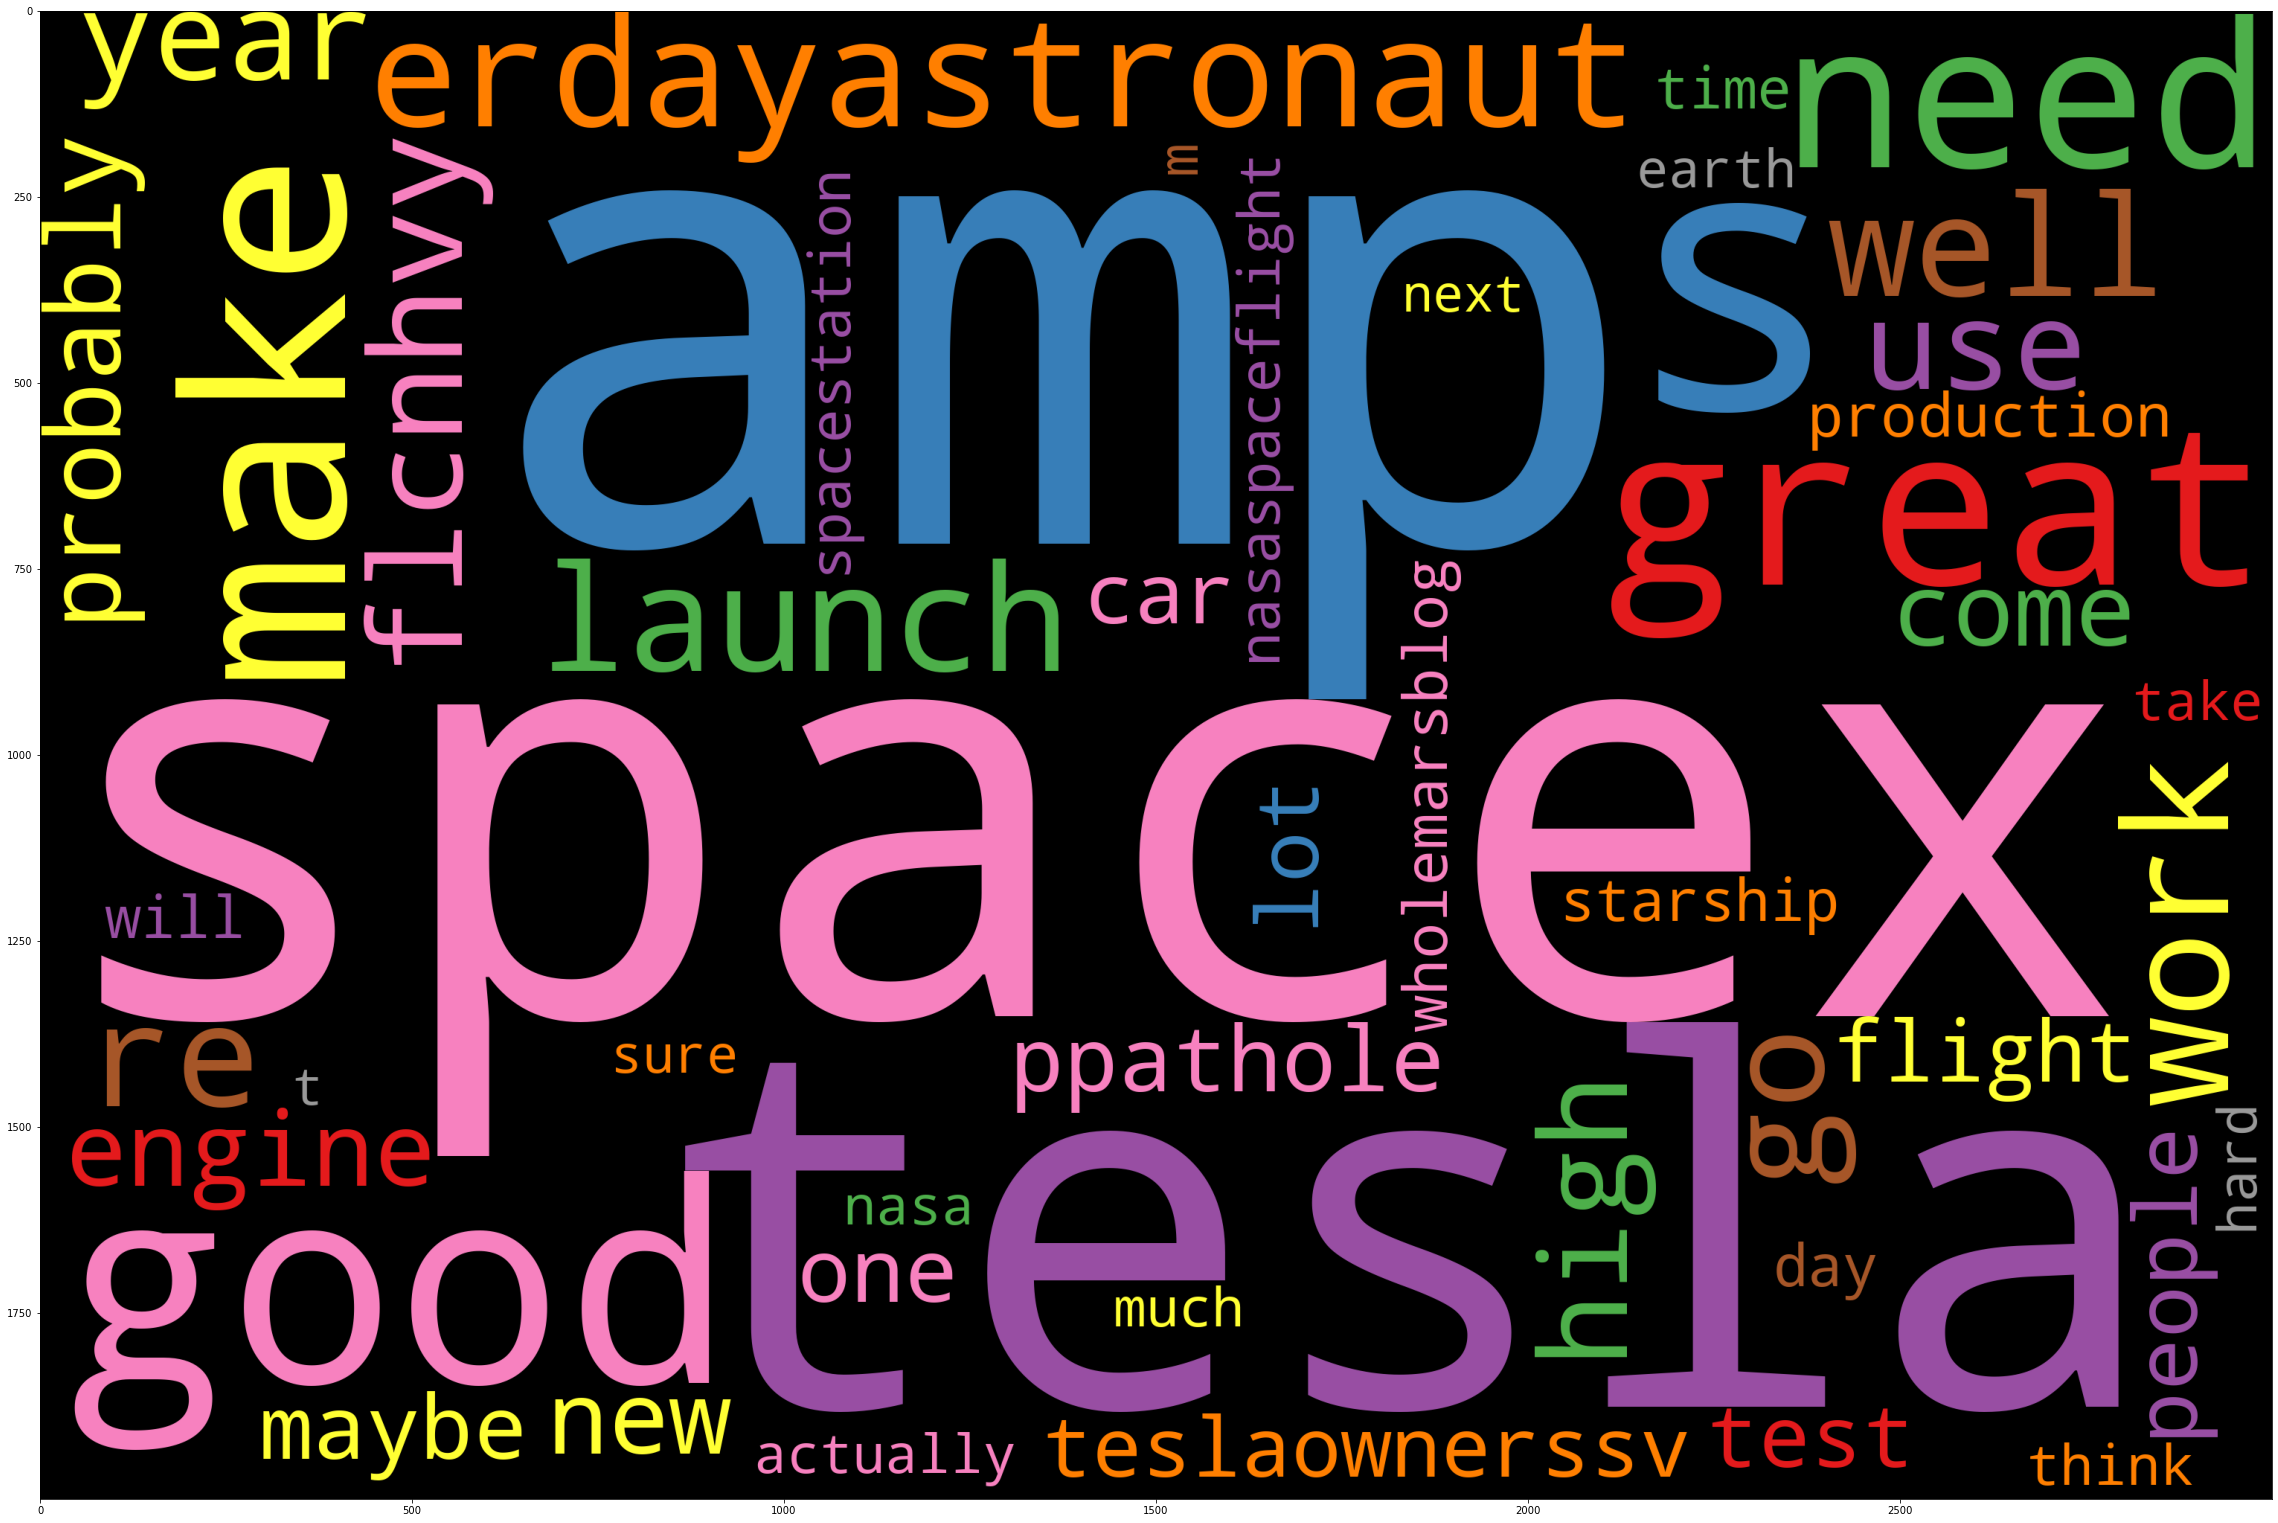

In [29]:
#define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('on')
    
# Generate Word Cloud

wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=50,
                   colormap='Set1',stopwords=STOPWORDS).generate(clean_tweets)
plot_cloud(wordcloud)

In [30]:
#en_core_web_sm is a small English pipeline trained on written web text (blogs, news, comments), that includes vocabulary,
#syntax and entities.

## 7. Named Entity Recognition
* The key aim to performing Named Entity Recognition on a piece of text is to extract key information from the text.
* named entities in text into predefined categories such as names of persons, organizations, locations, etc.

In [31]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')

one_block=clean_tweets
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [33]:
for token in doc_block[100:200]:
    print(token,token.pos_)

two NUM
element NOUN
lunar ADJ
gateway NOUN
together ADV
one NUM
mission NOUN
yesblkmdl3 NOUN
rationaletienne PROPN
adamklotz PROPN
once ADV
predict VERB
cash NOUN
flow NOUN
reasonably ADV
well ADV
starlink NOUN
iporationaletienne PROPN
adamklotz NOUN
starlink VERB
staggeringly ADV
difficult ADJ
technical ADJ
amp NOUN
economic ADJ
endeavor NOUN
however ADV
adamklotz NOUN
spacex AUX
need AUX
pass VERB
deep ADJ
chasm NOUN
negative ADJ
cash NOUN
flow NOUN
next ADJ
year NOUN
low ADJ
cost NOUN
per ADP
ton NOUN
carbon NOUN
sequester NOUN
net ADJ
value NOUN
product NOUN
make VERB
must AUX
scalable VERB
g ADV
mean ADJ
price NOUN
country NOUN
only ADV
difference NOUN
taxis VERB
amp NOUN
shippingtobyliiiiiiiiii NOUN
this DET
intend ADJ
earth NOUN
may AUX
idea VERB
apply VERB
mars PROPN
toocryptoshrikar PROPN
coindesk PROPN
tesla NOUN
danzpalmer VERB
u0001f923u0001f923xprize PROPN
team NOUN
manage VERB
100 NUM
m VERB
carbon NOUN
capture NOUN
prize NOUN
everyone PRON
tesla ADV
receive VERB
stock N

In [34]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['fix', 'coin', 'unit', 'time', 'michaelhodapp', 'launch', 'tower', 'stack', 'raptor', 'orbit', 'booster', 'improve', 'ship', 'amp', 'booster', 'work', 'ðogecoin', 'video', 'people', 'speak', 'lexfridman', 'cute', 'image', 'doesn\x92t', 'reflect', 'time', 'cost', 'people', 'rain', 'amp', 'let', 'doge', 'come', 'fun', 'simplicity', 'geniusastrogdogg', 'spacex', 'yupjbuttermost', 'dogecoinrich', 'u0001f923u0001f923wapodavenport', 'astrojordy', 'decade', 'work', 'look', 'note', 'email', 'textsastrojordy', 'yeslesson', 'learnedof', 'earth', 'marstime', 'tell', 'story', 'tesla', 'amp', 'spacextheonion', 'read', 'greatthe', 'kingdom', 'hear', 'name', 'yearsgrimezsz', 'dogecakeyolt', 'yeahowenspark', 'surethe', 'thing', 'restaurant', 'get', 'hang', 'stranger', 'currency', 'earthredlineshifter', 'spacex', 'say', 'ship', 'landing', 'burn', 'solution', 'erdayastronaut', 'spacex', 'use', 'gas', 'maneuvering', 'rcs', 'thruster', 'spacex', 'seem', 'turbopumpfed', 'raptor', 'nasaspaceflight', 'yesrt

In [35]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:20] 
#Viewing top 20 Results

,word,count
0,spacex,203
1,amp,176
2,tesla,89
3,make,63
4,launch,57
5,need,46
6,work,45
7,go,40
8,get,38
9,year,37


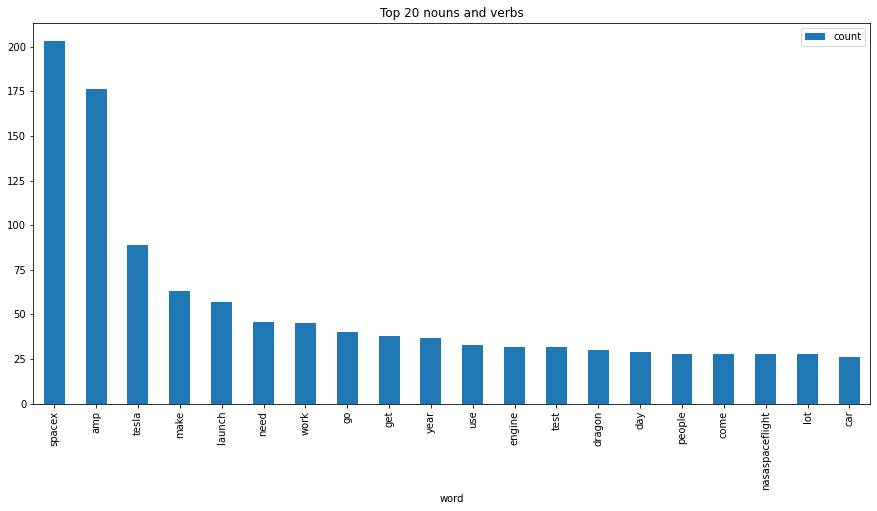

In [36]:
# Visualizing results (Barchart for top 20 nouns + verbs)
wd_df[0:20].plot.bar(x='word',figsize=(15,7),title='Top 20 nouns and verbs');

# Emotion Mining - Sentiment Analysis

In [37]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(tweets))
sentences

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [38]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
919,"@kenyanwalstreet Not actually a payout, just a..."
920,"It may never pay out, as the stock cant b ht..."
921,Details Aug 28.
922,AI symbiosis while u wait @vistacruiser7 @flcn...


>**Emotion Lexicon - 'Affin'**
* Afinn is the simplest yet popular lexicons used for sentiment analysis 
* It contains 3300+ words with a polarity score associated with each word.
* AFINN is a list of words rated for valence with an integer between minus five (negative) and plus five (positive).

In [39]:
# Emotion Lexicon - Affin
affin=pd.read_csv('Afinn (1).csv',sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


>* To check the polarity of the word Whether it is Positive or Negative

In [40]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [41]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [42]:
# manual testing
calculate_sentiment(text='hate')

-3

In [43]:
calculate_sentiment(text='Great')

3

In [44]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0      0
1      0
2      3
3      3
4      0
      ..
919    0
920   -4
921    0
922   -2
923    0
Name: sentiment_value, Length: 924, dtype: int64

In [55]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0      13
1       4
2       4
3      13
4       8
       ..
919    11
920    31
921     3
922    47
923    15
Name: word_count, Length: 924, dtype: int64

In [56]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,index,word_count
647,Very ba https://t.co/tJsh1Exz1Q @justpaulinel...,-8,647,60
64,"Also, the road to hell is mostly paved with ba...",-7,64,11
837,Cool Model 3 review by @iamjamiefoxx https://t...,-7,837,61
611,"Then static fire, checkouts, static fire, fly ...",-4,611,12
920,"It may never pay out, as the stock cant b ht...",-4,920,31
...,...,...,...,...
81,@teslaownersSV This is a good one @MrBeastYT I...,13,81,38
585,The open areas https://t.co/rabjKrtQlw @Sav...,14,585,138
719,We just havent observed the https://t.co/mez...,15,719,72
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",16,36,231


In [57]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    924.000000
mean       1.345238
std        2.684749
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       16.000000
Name: sentiment_value, dtype: float64

In [58]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,index,word_count
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,0,13
1,Have you tried it?,0,1,4
4,Now on to the next for even more!!,0,4,8
5,Happy New Year of the Ox!,0,5,6
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-2,6,14
...,...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0,919,11
920,"It may never pay out, as the stock cant b ht...",-4,920,31
921,Details Aug 28.,0,921,3
922,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,922,47


In [59]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,index,word_count
2,@joerogan @Spotify Great interview!,3,2,4
3,@gtera27 Doge is underestimated @teslacn Congr...,3,3,13
7,https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy ...,2,7,10
9,The most entertaining outcome is the most like...,3,9,109
17,Back to work I go @CapybaraSurfer @MattWallace...,4,17,38
...,...,...,...,...
911,He was one of the very best.,3,911,7
913,"@Ali_Afshari In general, we need to improve ho...",4,913,87
915,"@burakaydik True Wow, IHOP &amp; GitHub are cl...",3,915,15
917,This is both great &amp; terrifying.,3,917,6


In [60]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,index,word_count
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,0,13
1,Have you tried it?,0,1,4
2,@joerogan @Spotify Great interview!,3,2,4
3,@gtera27 Doge is underestimated @teslacn Congr...,3,3,13
4,Now on to the next for even more!!,0,4,8
...,...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0,919,11
920,"It may never pay out, as the stock cant b ht...",-4,920,31
921,Details Aug 28.,0,921,3
922,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,922,47


C:\Users\shaik\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

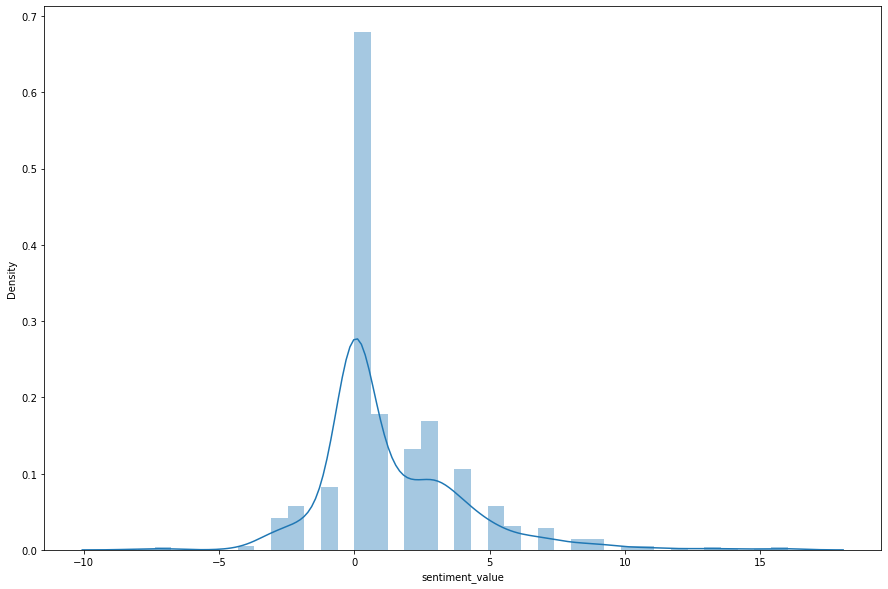

In [61]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

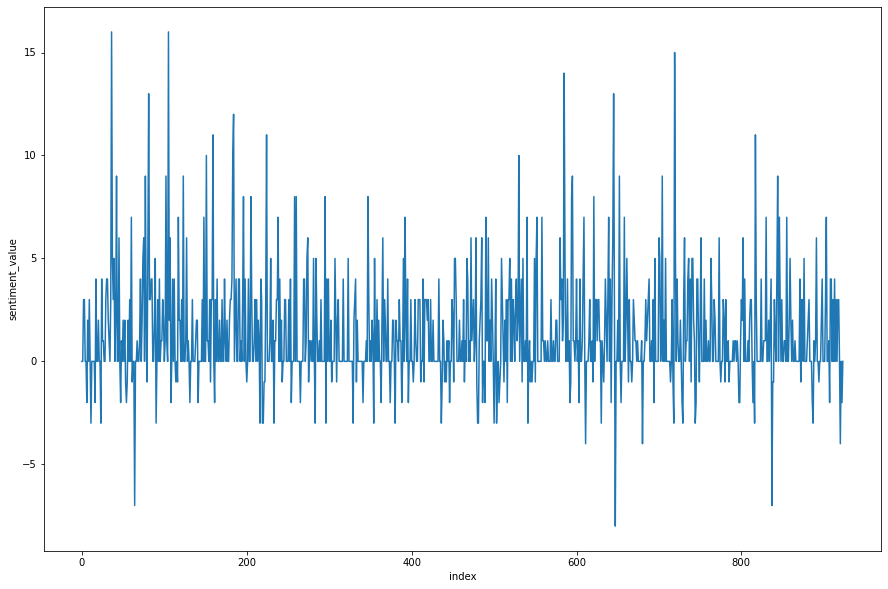

In [62]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

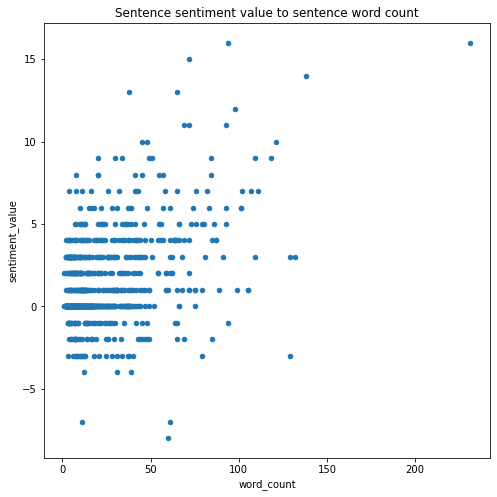

In [63]:
# Correlation analysis
sent_df.plot.scatter(x='word_count',y='sentiment_value',figsize=(8,8),title='Sentence sentiment value to sentence word count')

# ============================================================

## Extract reviews of any product from ecommerce website like amazon, Perform emotion mining


### Differnce B/W Sentiment Analysis and Emotion mining:
>Sentiment statistics monitor simplified positive or negative markers.
* While emotion analysis focuses on a broad spectrum of human emotions and sensitivities. This method helps to measure the differences in the feelings that various viewers or buyers express either using emoji or textual data.

In [2]:
!pip install AutoScraper

  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1271 sha256=0f4de46d082b36b798c6dc894337a52037ee320d5da0d71aa9d9fb59abb3748f
  Stored in directory: c:\users\shaik\appdata\local\pip\cache\wheels\73\2b\cb\099980278a0c9a3e57ff1a89875ec07bfa0b6fcbebb9a8cad3
Successfully built bs4


In [8]:
from autoscraper import AutoScraper

In [9]:
amazon_url="https://www.amazon.in/Test-Exclusive_2020_1178-Multi-3GB-Storage/product-reviews/B089MTJVLD/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"
wanted_list=["Claim for Replacement of Oneplus 9R phone..."]

## Extracting Reviews of 'One Plus 9R' Mobile from Ecommerce Website Amazon

In [40]:
scraper= AutoScraper()
result=scraper.build(amazon_url,wanted_list)
print(result)

['Claim for Replacement of Oneplus 9R phone...', 'OnePlus 9R - Not As per Expectations', 'Heating issue', 'Amazing - True Flagship', 'Over heat mobile', 'HEATING ISSUE', 'Disappointed with 9 R Mobile', 'Style name: 12GB RAM, 256GB StorageColour: Carbon Black', 'Lovin it.', 'Honest Review after 4 Days of use.', "It's not a worthy mobile, it has camera and heating issue for this price it's not good", 'Style name: 8GB RAM, 128GB StorageColour: Carbon Black', 'Reviewed in India on 19 April 2021', 'My first time buying a OnePlus phone and I really like the finish of the one. Camera is excellent, Android 11 is very smooth to use, functions are fast.Just my first day of usage so hard to be critical of anything. The downside for me is that there is no place expand the memory.---Updating my review after 100 days of using. Bought on April 19th updated review on July 29th.Super fast charging.. 30 mins and goes from say 30% battery to 100% battery charge.I also bought the OnePlus Buds Z along with

## Sentiment Analysis

### Emotional Lexicon:
>The list of emotions and words that express each emotion is called Emotion Lexicon

*some of the popular lexicons are

* Affin
* Vader
* TextBlob
* NRC

In [46]:
affin=pd.read_csv('Afinn (1).csv', encoding='latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [47]:
from nltk import tokenize
sentences= tokenize.sent_tokenize(" ".join(result))
sentences[0:] 

['Claim for Replacement of Oneplus 9R phone... OnePlus 9R - Not As per Expectations Heating issue Amazing - True Flagship Over heat mobile HEATING ISSUE Disappointed with 9 R Mobile Style name: 12GB RAM, 256GB StorageColour: Carbon Black Lovin it.',
 'Honest Review after 4 Days of use.',
 "It's not a worthy mobile, it has camera and heating issue for this price it's not good Style name: 8GB RAM, 128GB StorageColour: Carbon Black Reviewed in India on 19 April 2021 My first time buying a OnePlus phone and I really like the finish of the one.",
 'Camera is excellent, Android 11 is very smooth to use, functions are fast.Just my first day of usage so hard to be critical of anything.',
 'The downside for me is that there is no place expand the memory.---Updating my review after 100 days of using.',
 'Bought on April 19th updated review on July 29th.Super fast charging.. 30 mins and goes from say 30% battery to 100% battery charge.I also bought the OnePlus Buds Z along with the phone and thes

In [48]:
sent_df = pd.DataFrame(sentences, columns=['Reviews'])
sent_df 

,Reviews
0,Claim for Replacement of Oneplus 9R phone... O...
1,Honest Review after 4 Days of use.
2,"It's not a worthy mobile, it has camera and he..."
3,"Camera is excellent, Android 11 is very smooth..."
4,The downside for me is that there is no place ...
5,Bought on April 19th updated review on July 29...
6,Connecting the buds sometimes is an issue.
7,Sometimes it will connect automatically and so...
8,Reviewed in India on 30 May 2021 HiPlease cons...
9,The replacement policy was only for 10 days an...


In [52]:
affinity_scores = affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [53]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score 

In [58]:
sent_df['sentiment_value'] = sent_df['Reviews'].apply(calculate_sentiment) 

In [59]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['Reviews'].str.split().apply(len)
sent_df['word_count']

0     40
1      7
2     48
3     25
4     20
5     38
6      7
7     28
8     41
9     17
10    71
11    10
12    11
13    11
14     8
15    24
16    40
17    16
Name: word_count, dtype: int64

In [60]:
sent_df

,Reviews,sentiment_value,word_count
0,Claim for Replacement of Oneplus 9R phone... O...,2,40
1,Honest Review after 4 Days of use.,0,7
2,"It's not a worthy mobile, it has camera and he...",7,48
3,"Camera is excellent, Android 11 is very smooth...",2,25
4,The downside for me is that there is no place ...,-2,20
5,Bought on April 19th updated review on July 29...,6,38
6,Connecting the buds sometimes is an issue.,0,7
7,Sometimes it will connect automatically and so...,3,28
8,Reviewed in India on 30 May 2021 HiPlease cons...,0,41
9,The replacement policy was only for 10 days an...,-2,17


In [61]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe() 

count    18.000000
mean      1.666667
std       2.497057
min      -2.000000
25%       0.000000
50%       2.000000
75%       2.750000
max       7.000000
Name: sentiment_value, dtype: float64

In [62]:
sent_df['index']=range(0,len(sent_df))

<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

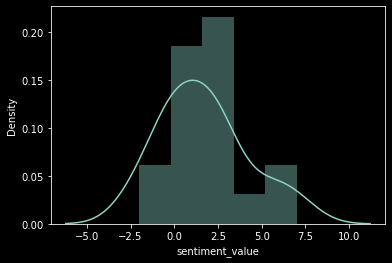

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use(['dark_background'])
sns.distplot(sent_df['sentiment_value']) 

In [75]:
print(sent_df['sentiment_value'].skew())
print(sent_df['sentiment_value'].kurt())

0.6318758966791233
0.05129049483802062


### Observation:
   >We can observe distribution that the curve is **positively skewed**, It shows that most of the reviews are **positive**

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

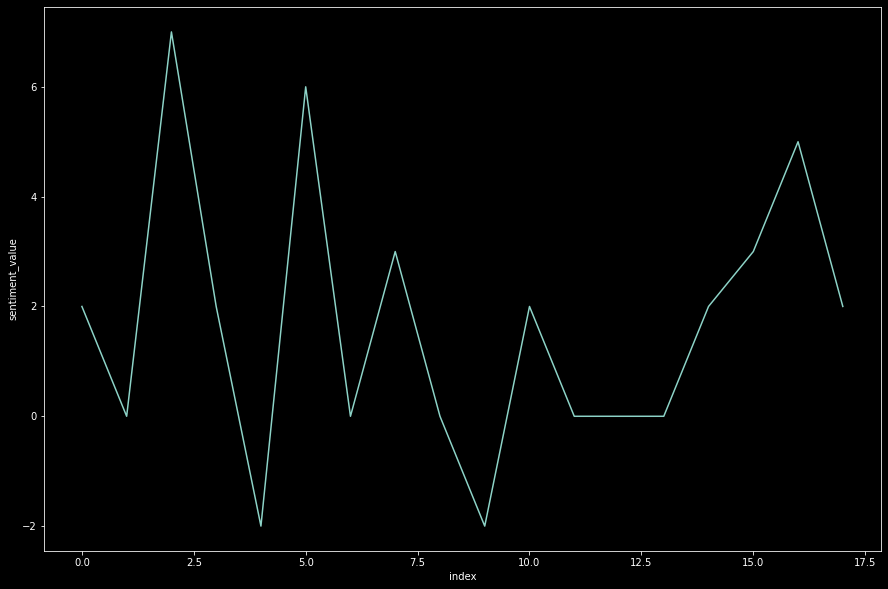

In [68]:
plt.figure(figsize=(15, 10))
plt.style.use(['dark_background'])
sns.lineplot(y='sentiment_value',x='index',data=sent_df) 

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

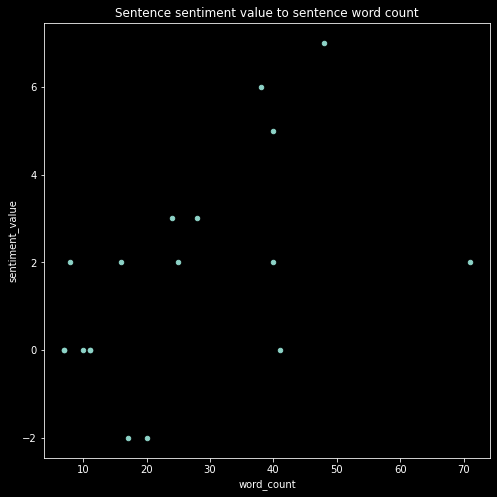

In [67]:
plt.style.use(['dark_background'])
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')

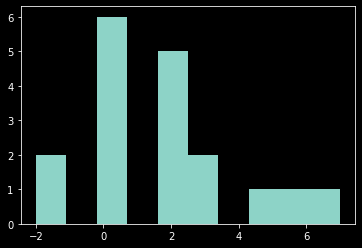

<Figure size 720x360 with 0 Axes>

In [71]:
#another style for visualisation
plt.style.use(['dark_background'])
plt.hist(sent_df['sentiment_value'])
plt.figure(figsize=(10,5))
xlabel='sentiment_value'

### Inference:
   By visualization and Analysis we can observe that most of the reviews have **sentiment value** is greater than zero i.e., **Positive review** about the Mobile **One Plus 9R**

# THE END!